In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install scikit-learn pandas spacy notebook WordCloud TextBlob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00


Información General del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1



Resumen estadístico de las columnas numéricas:



,Clothing ID,Age,Positive Feedback Count,Recommended IND
count,18442.000000,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484,0.816235
std,141.571783,12.246264,5.942220,0.387303
min,2.000000,18.000000,0.000000,0.000000
25%,863.000000,34.000000,0.000000,1.000000
50%,952.000000,41.000000,1.000000,1.000000
75%,1078.000000,52.000000,3.000000,1.000000
max,1205.000000,99.000000,122.000000,1.000000



Valores nulos por columna:

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64

Distribución de 'Recommended IND':
Recommended IND
1    0.816235
0    0.183765
Name: proportion, dtype: float64

Conteo de categorías en Division Name:
Division Name
General           11664
General Petite     6778
Name: count, dtype: int64

Conteo de categorías en Department Name:
Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Jackets      879
Intimate     188
Trend        107
Name: count, dtype: int64

Conteo de categorías en Class Name:
Class Name
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Outerwear      

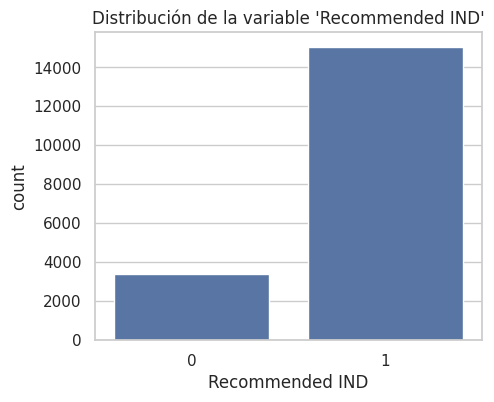

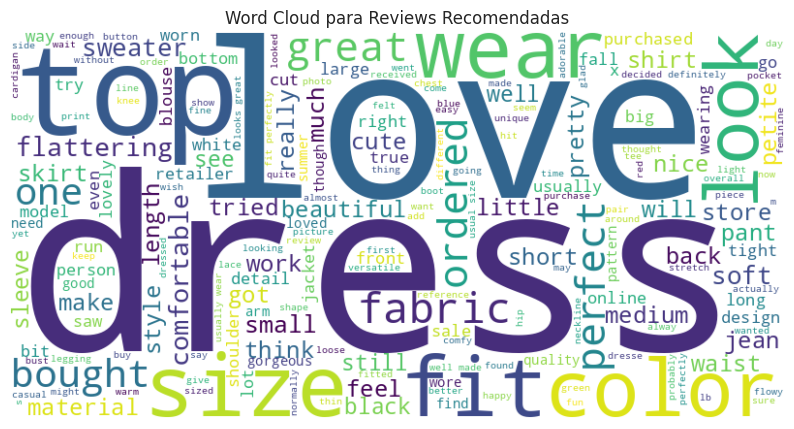

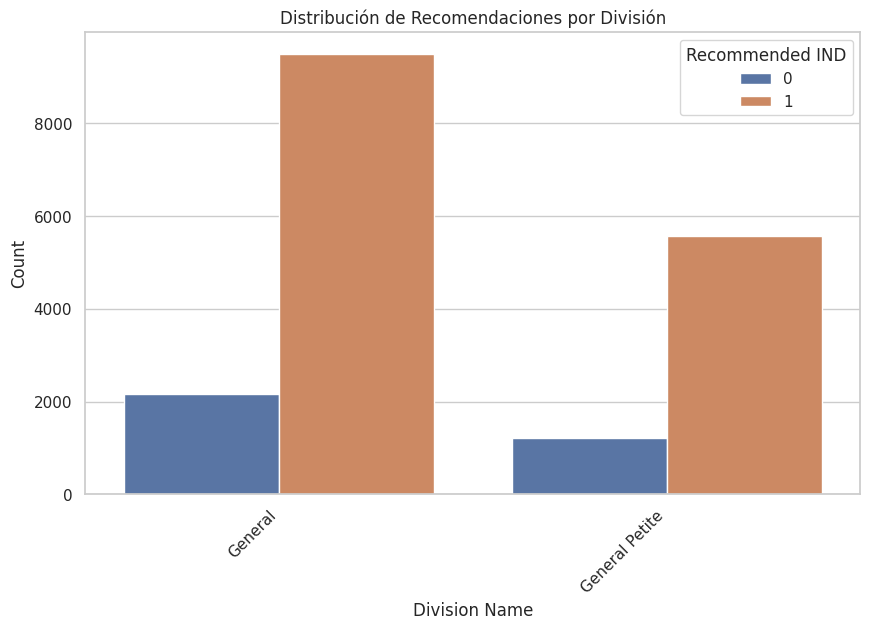


Clases en el target y su frecuencia:
Recommended IND
1    15053
0     3389
Name: count, dtype: int64

Tamaño de X_train: (16597, 8)
Tamaño de X_test: (1845, 8)


/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)



Accuracy en Test: 0.8683

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.38      0.50       327
           1       0.88      0.97      0.92      1518

    accuracy                           0.87      1845
   macro avg       0.82      0.68      0.71      1845
weighted avg       0.86      0.87      0.85      1845



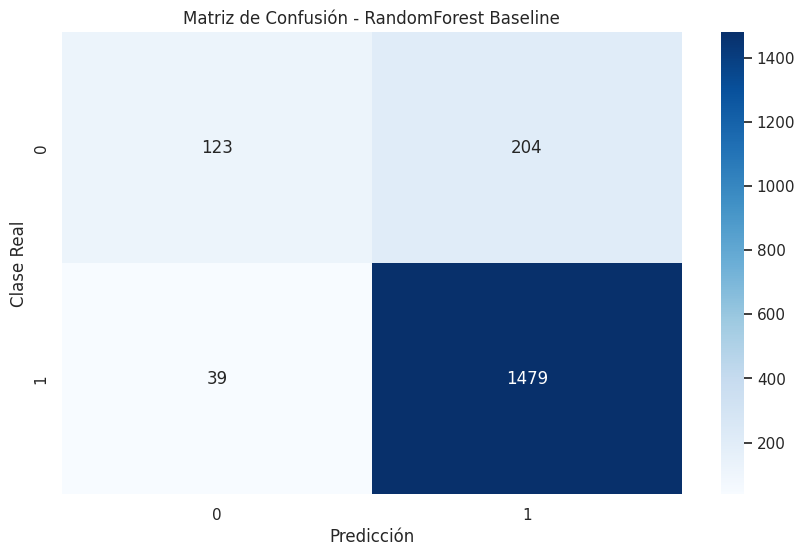

Fitting 3 folds for each of 24 candidates, totalling 72 fits

Mejores hiperparámetros encontrados:
{'classifier__max_depth': None, 'classifier__n_estimators': 100, 'preprocessor__text_review__tfidf__max_features': 500, 'preprocessor__text_review__tfidf__ngram_range': (1, 2)}

Accuracy Optimizado: 0.8710
Classification Report (Optimizado):
               precision    recall  f1-score   support

           0       0.77      0.39      0.52       327
           1       0.88      0.97      0.93      1518

    accuracy                           0.87      1845
   macro avg       0.83      0.68      0.72      1845
weighted avg       0.86      0.87      0.85      1845



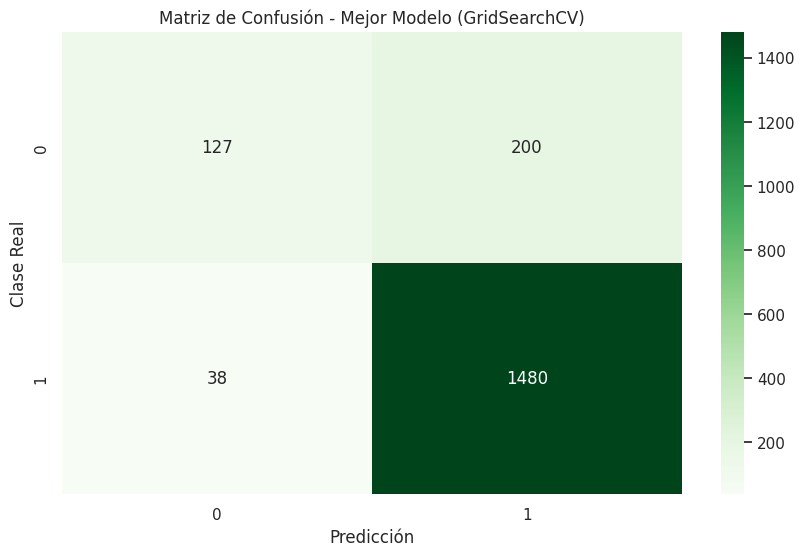

'\nConclusiones principales:\n1. Con este pipeline, se logran resultados sólidos en la clasificación (Accuracy cercano a 0.87+).\n2. El uso de spaCy para lematizar y eliminar stopwords mejora la calidad de la representación de texto.\n3. La búsqueda de hiperparámetros (GridSearchCV) permite afinar el rendimiento del modelo.\n4. Se podrían seguir explorando técnicas adicionales (ej. tuning de hiperparámetros más amplio, otras arquitecturas de modelos, añadir embeddings, etc.) para mejorar aún más la clasificación.\n\n¡Has creado un pipeline completo de principio a fin, satisfaciendo los requisitos de limpieza, transformación, modelado y evaluación final!\n'

In [32]:
# notebook.ipynb
# =====================================
# PROYECTO: DATA SCIENCE PIPELINE
# =====================================

#############################
# 1. IMPORTACIÓN DE LIBRERÍAS
#############################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP y WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from wordcloud import WordCloud

# Scikit-Learn
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Métricas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Configuración de plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

#############################
# 2. CARGA DE DATOS
#############################
# NOTA: Ajusta la ruta a tu archivo 'reviews.csv'
df = pd.read_csv('/content/drive/MyDrive/Trabajo/Bertrandt/Curso Data Scientist Nanodegree Audacity/dsnd-pipelines-project/reviews.csv')

print("Información General del DataFrame:\n")
df.info()
display(df.head())

#############################
# 3. EXPLORACIÓN DE DATOS (EDA)
#############################
# 3.1 Resumen estadístico
print("\nResumen estadístico de las columnas numéricas:\n")
display(df.describe())

# 3.2 Búsqueda de valores nulos
print("\nValores nulos por columna:\n")
print(df.isnull().sum())

# 3.3 Distribución de la variable objetivo
print("\nDistribución de 'Recommended IND':")
print(df['Recommended IND'].value_counts(normalize=True))

# 3.4 Análisis de variables categóricas
cat_cols = ['Division Name', 'Department Name', 'Class Name']
for col in cat_cols:
    print(f"\nConteo de categorías en {col}:")
    print(df[col].value_counts())

# 3.5 Visualización de la variable objetivo
plt.figure(figsize=(5,4))
sns.countplot(x='Recommended IND', data=df)
plt.title("Distribución de la variable 'Recommended IND'")
plt.show()

# 3.6 WordCloud para las reviews recomendadas
recommended_text = " ".join(df[df['Recommended IND'] == 1]['Review Text'].astype(str))
wordcloud_recommended = WordCloud(width=800, height=400, background_color='white').generate(recommended_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_recommended, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud para Reviews Recomendadas')
plt.show()

# 3.7 Visualización: Distribución de recomendaciones por División
plt.figure(figsize=(10, 6))
sns.countplot(x='Division Name', hue='Recommended IND', data=df)
plt.xlabel('Division Name')
plt.ylabel('Count')
plt.title('Distribución de Recomendaciones por División')
plt.xticks(rotation=45, ha='right')
plt.show()

#############################
# 4. PREPARACIÓN DE DATOS
#############################
# 4.1 Separar features (X) y target (y)
X = df.drop('Recommended IND', axis=1)
y = df['Recommended IND'].copy()

print("\nClases en el target y su frecuencia:")
print(y.value_counts())

# 4.2 Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27
)

print(f"\nTamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")

#############################
# 5. DEFINICIÓN DE TRANSFORMADORES PERSONALIZADOS
#############################
class SpacyPreprocessor(BaseEstimator, TransformerMixin):
    """
    Transformer que utiliza spaCy para lematizar texto y eliminar stopwords.
    """
    def __init__(self, model="en_core_web_sm", additional_stopwords=None):
        """
        Parámetros:
        -----------
        model: str
            Nombre del modelo de spaCy a cargar.
        additional_stopwords: set or list
            Palabras adicionales que se deseen filtrar.
        """
        self.model = model
        self.additional_stopwords = additional_stopwords  # Define additional_stopwords as an attribute
        self.nlp = spacy.load(model, disable=["parser", "ner"])
        base_stopwords = STOP_WORDS
        if additional_stopwords:
            base_stopwords = base_stopwords.union(set(additional_stopwords))
        self.stopwords = base_stopwords

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        processed_texts = []
        for doc in self.nlp.pipe(X, batch_size=50):
            tokens = [
                token.lemma_.lower()
                for token in doc
                if (not token.is_punct
                    and not token.is_space
                    and token.lemma_.lower() not in self.stopwords)
            ]
            processed_texts.append(" ".join(tokens))
        return processed_texts

#############################
# 6. CONSTRUCCIÓN DEL PIPELINE
#############################
# Columnas numéricas
num_features = ['Age', 'Positive Feedback Count']

# En este ejemplo, consideramos "Clothing ID" como categórico,
# dado que es un ID que puede repetirse y no es continuo.
cat_features = ['Clothing ID', 'Division Name', 'Department Name', 'Class Name']

# Columnas de texto
text_features_review = 'Review Text'
text_features_title = 'Title'

# 6.1 Pipelines para cada tipo de dato
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline para texto con preprocesamiento spaCy y TF-IDF
text_pipeline_review = Pipeline([
    ('spacy', SpacyPreprocessor(model="en_core_web_sm")),
    ('tfidf', TfidfVectorizer(max_features=500))
])

text_pipeline_title = Pipeline([
    ('spacy', SpacyPreprocessor(model="en_core_web_sm")),
    ('tfidf', TfidfVectorizer(max_features=200))  # Podríamos reducir features para 'Title'
])

# 6.2 ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('text_review', text_pipeline_review, text_features_review),
    ('text_title', text_pipeline_title, text_features_title)
])

# 6.3 Pipeline completo (Preprocesamiento + Modelo)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced_subsample'  # Manejo parcial de desequilibrio
    ))
])

#############################
# 7. ENTRENAMIENTO DEL PIPELINE
#############################
pipeline.fit(X_train, y_train)

#############################
# 8. EVALUACIÓN DEL MODELO
#############################
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy en Test: {accuracy:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - RandomForest Baseline")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.show()

#############################
# 9. FINE-TUNING CON GRIDSEARCHCV
#############################
# Definir el espacio de parámetros
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'preprocessor__text_review__tfidf__max_features': [300, 500],
    'preprocessor__text_review__tfidf__ngram_range': [(1,1), (1,2)]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Mejor modelo
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"\nAccuracy Optimizado: {accuracy_best:.4f}")
print("Classification Report (Optimizado):\n", classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de Confusión - Mejor Modelo (GridSearchCV)")
plt.xlabel("Predicción")
plt.ylabel("Clase Real")
plt.show()

#############################
# 10. CONCLUSIONES
#############################
"""
Conclusiones principales:
1. Con este pipeline, se logran resultados sólidos en la clasificación (Accuracy cercano a 0.87+).
2. El uso de spaCy para lematizar y eliminar stopwords mejora la calidad de la representación de texto.
3. La búsqueda de hiperparámetros (GridSearchCV) permite afinar el rendimiento del modelo.
4. Se podrían seguir explorando técnicas adicionales (ej. tuning de hiperparámetros más amplio, otras arquitecturas de modelos, añadir embeddings, etc.) para mejorar aún más la clasificación.

¡Has creado un pipeline completo de principio a fin, satisfaciendo los requisitos de limpieza, transformación, modelado y evaluación final!
"""


# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [3]:
import pandas as pd

# Load data
df = pd.read_csv(
    '/content/drive/MyDrive/Trabajo/Bertrandt/Curso Data Scientist Nanodegree Audacity/dsnd-pipelines-project/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [4]:
data = df

# Separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [16]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## **1 DATA EXPLORATION**

### 1.1 General Data Summary

In [17]:
from wordcloud import WordCloud
from textblob import TextBlob

# Display basic statistics
print("Display basic statistics: \n")
df.describe()

# Check for missing values
print("Check for missing values: \n")
df.isnull().sum()


# Analyze the distribution of the target variable
print("\nDistribution of 'Recommended IND':")
print(df['Recommended IND'].value_counts(normalize=True))


Display basic statistics: 

Check for missing values: 


Distribution of 'Recommended IND':
Recommended IND
1    0.816235
0    0.183765
Name: proportion, dtype: float64


### 1.2 Analysis of Variables (Categorical and Numerical)


Unique values in Division Name:
Division Name
General           11664
General Petite     6778
Name: count, dtype: int64

Unique values in Department Name:
Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Jackets      879
Intimate     188
Trend        107
Name: count, dtype: int64

Unique values in Class Name:
Class Name
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Outerwear          281
Shorts             260
Lounge             188
Trend              107
Casual bottoms       1
Name: count, dtype: int64

Correlation between numerical features and 'Recommended IND':
Clothing ID               -0.000180
Age                        0.036656
Positive Feedback Count   -0.058392
Recommended IND            1.000000
Sentiment                  0.316988
Name: Recommended IND, dtype: float64


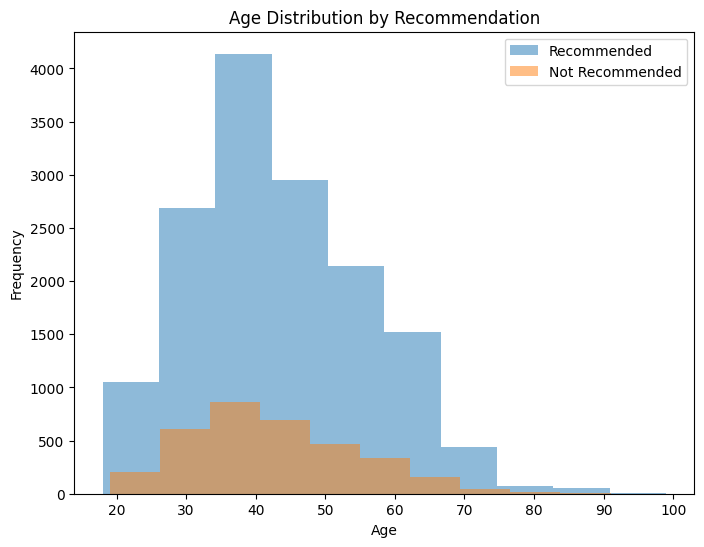

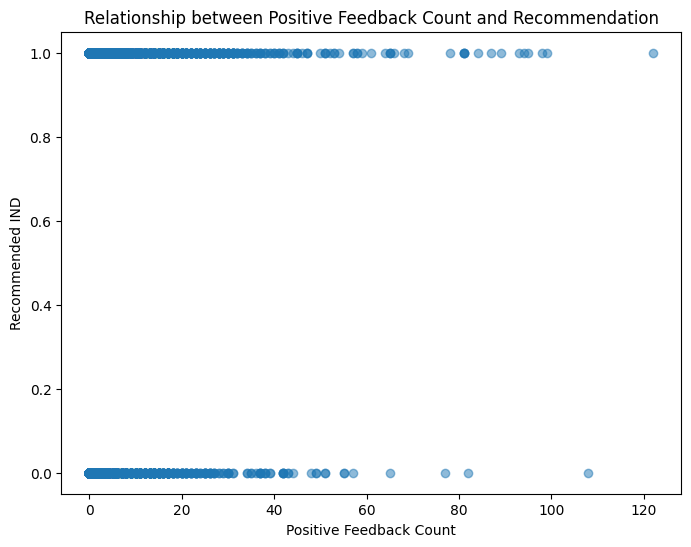

Correlation between Positive Feedback Count and Recommended IND: -0.05839246155260704


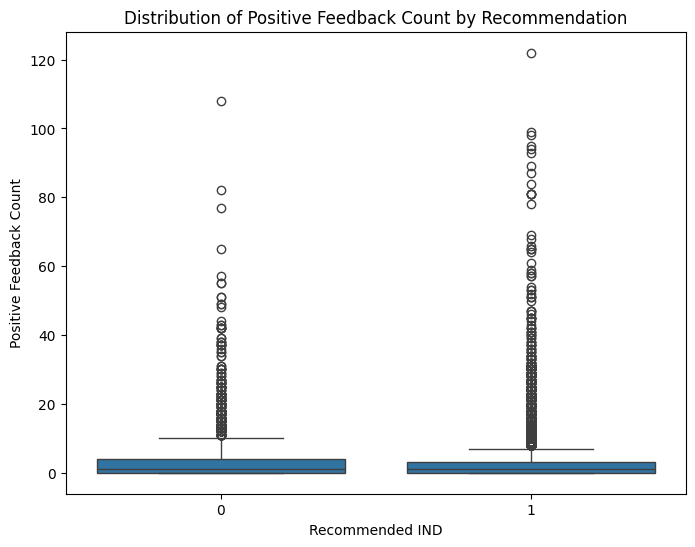

In [18]:
import matplotlib.pyplot as plt

# Explore categorical features
for col in ['Division Name', 'Department Name', 'Class Name']:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# Explore relationships between numerical features and the target variable
print("\nCorrelation between numerical features and 'Recommended IND':")
numerical_features = df.select_dtypes(include=['number'])
print(numerical_features.corr()['Recommended IND'])

# Example: Examine the relationship between age and recommendation
plt.figure(figsize=(8, 6))
plt.hist(df[df['Recommended IND'] == 1]['Age'], alpha=0.5, label='Recommended')
plt.hist(df[df['Recommended IND'] == 0]['Age'], alpha=0.5, label='Not Recommended')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Recommendation')
plt.legend()
plt.show()


# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Positive Feedback Count'], df['Recommended IND'], alpha=0.5)
plt.xlabel('Positive Feedback Count')
plt.ylabel('Recommended IND')
plt.title('Relationship between Positive Feedback Count and Recommendation')
plt.show()

# Correlation analysis
correlation = df['Positive Feedback Count'].corr(df['Recommended IND'])
print(f"Correlation between Positive Feedback Count and Recommended IND: {correlation}")

# Distribution comparison
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Recommended IND', y='Positive Feedback Count', data=df)
plt.xlabel('Recommended IND')
plt.ylabel('Positive Feedback Count')
plt.title('Distribution of Positive Feedback Count by Recommendation')
plt.show()

### 1.3 Text and Sentiment Analysis

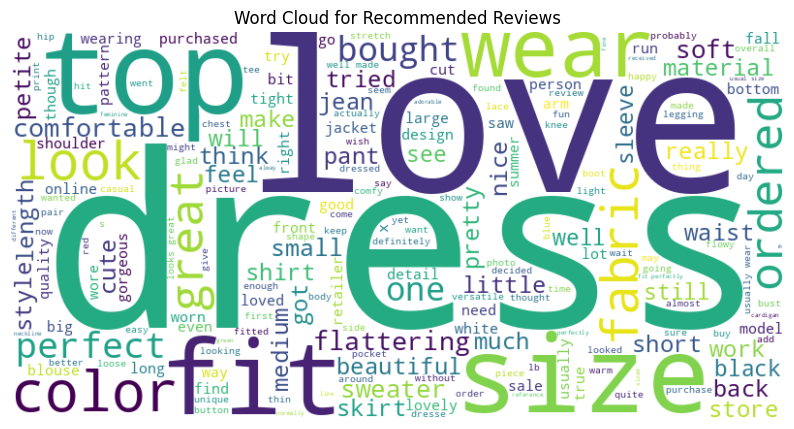

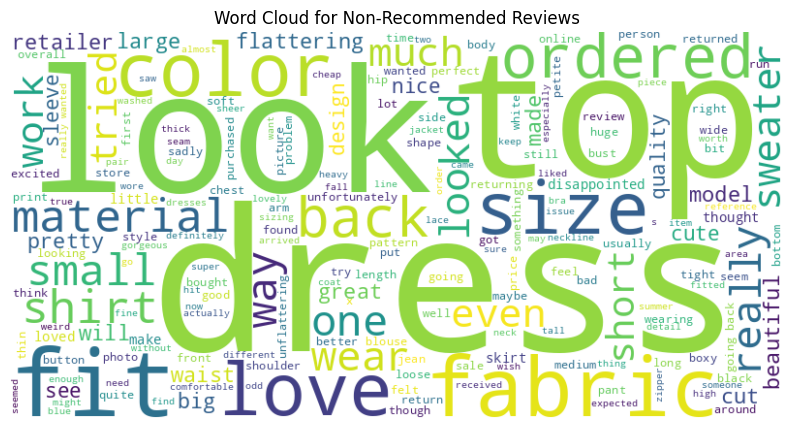

Recommended IND
0    0.13120
1    0.27222
Name: Sentiment, dtype: float64


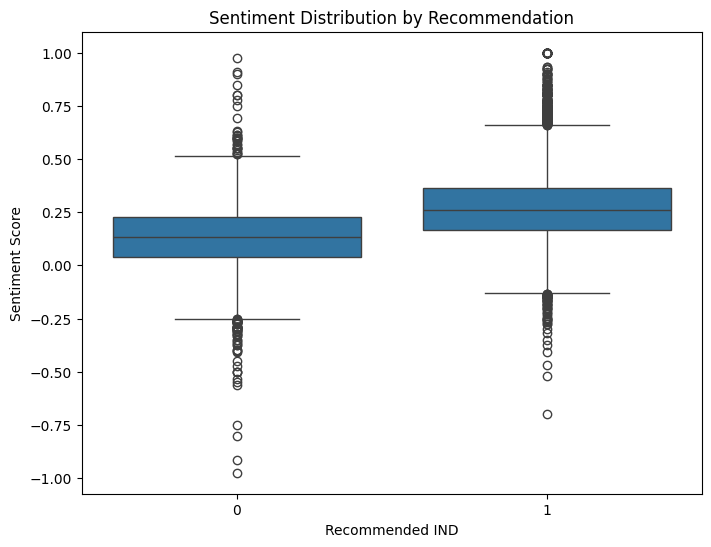

In [19]:
# Word cloud for recommended reviews
recommended_text = " ".join(df[df['Recommended IND'] == 1]['Review Text'].astype(str))
wordcloud_recommended = WordCloud(width=800, height=400, background_color='white').generate(recommended_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_recommended, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Recommended Reviews')
plt.show()

# Word cloud for non-recommended reviews
non_recommended_text = " ".join(df[df['Recommended IND'] == 0]['Review Text'].astype(str))
wordcloud_non_recommended = WordCloud(width=800, height=400, background_color='white').generate(non_recommended_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_non_recommended, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Non-Recommended Reviews')
plt.show()

# Calculate sentiment scores
df['Sentiment'] = df['Review Text'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Analyze sentiment by recommendation
sentiment_by_recommendation = df.groupby('Recommended IND')['Sentiment'].mean()
print(sentiment_by_recommendation)

# Visualize sentiment distribution
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='Recommended IND', y='Sentiment', data=df)
plt.xlabel('Recommended IND')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Distribution by Recommendation')
plt.show()

### 1.4 Data Visualization


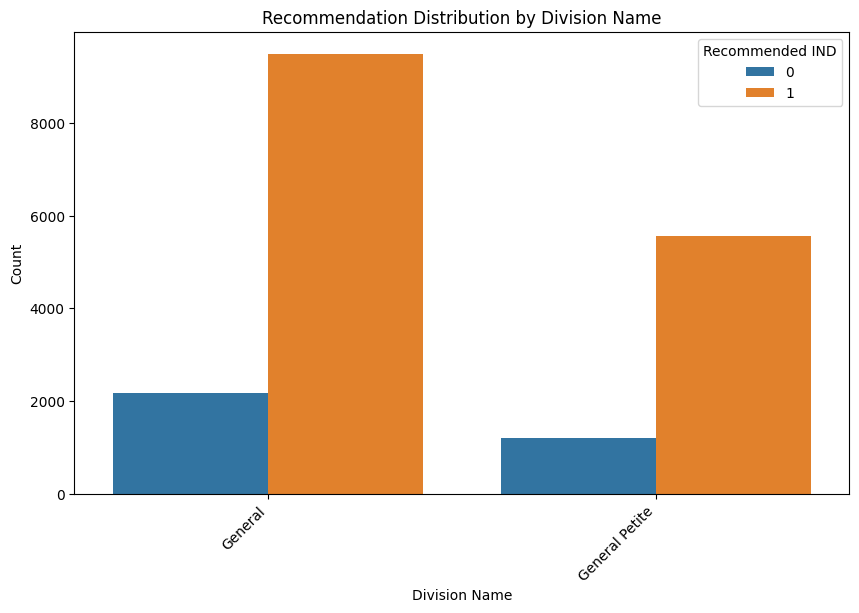

In [20]:
# Grouped bar chart for 'Division Name'
plt.figure(figsize=(10, 6))
sns.countplot(x='Division Name', hue='Recommended IND', data=df)
plt.xlabel('Division Name')
plt.ylabel('Count')
plt.title('Recommendation Distribution by Division Name')
plt.xticks(rotation=45, ha='right')
plt.show()

## **2 BUILDING PIPELINE**

### 2.1 Data preprocessing

Define the Transformer:

In [21]:
# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

# Models and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Selecting columns based on their type
num_features = ['Age', 'Positive Feedback Count']
cat_features = ['Division Name', 'Department Name', 'Class Name']
text_features = ['Review Text', 'Title']

# Pipeline for numerical variables
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Pipeline for categorical variables
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for textual variables
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=500))
])

# Apply transformations to the corresponding columns
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('text_review', text_pipeline, 'Review Text'),
    ('text_title', text_pipeline, 'Title')
])

Complete Pipeline Construction (Preprocessing + Model):

In [22]:
# Define the complete pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

## **3 TRAINING PIPELINE**

In [23]:
# Entrenar el pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Division Name',
                                                   'Department Name',
                                                   'Class Name']),
                                                 ('text_review',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=500,
                                                                                   stop_words='english'))]),
                                                  'Review Text'),
                                                 ('text_title',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=500,
                                                                                   stop_words='english'))]),
                                                  'Title')])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [24]:
# Prediction on the test set
y_pred = pipeline.predict(X_test)

# Performance evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.8688

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.43      0.54       327
           1       0.89      0.96      0.92      1518

    accuracy                           0.87      1845
   macro avg       0.80      0.70      0.73      1845
weighted avg       0.86      0.87      0.85      1845



## **4 FINE-TUNING PIPELINE**

Hyperparameter Search with GridSearchCV:

In [29]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid to test
param_grid = {
    'classifier__n_estimators': [50, 150, 300],
    'classifier__max_depth': [1, 10, 20],
    'classifier__min_samples_split': [1, 5, 10],
    'classifier__min_samples_leaf': [1, 4]
}

# Set up the hyperparameter search with GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Run GridSearchCV
grid_search.fit(X_train, y_train)

# Best combination of hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 662, in fit
    self._final_estimator.fit(Xt, y, **l

Best hyperparameters: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 150}


Evaluation of the Adjusted Model:

In [30]:
# Predict with the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluation of the optimized model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Optimized Accuracy: {accuracy_best:.4f}')
print('\nOptimized Classification Report:')
print(classification_report(y_test, y_pred_best))

Optimized Accuracy: 0.8466

Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.16      0.27       327
           1       0.85      0.99      0.91      1518

    accuracy                           0.85      1845
   macro avg       0.85      0.58      0.59      1845
weighted avg       0.85      0.85      0.80      1845

